# Linear Regression

For this linear regression example, we will be using the heart disease dataset, which is a public health dataset that can be retrieved from [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset).

For this particular example, we will be only using two fields, the _trestbps_ (resting blood pressure in mm/hg) and _thalach_ (maximum heart rate achieved). There isn't much correlation between the data but for demonstration purposes, we will be using them to estimate linear regression using existing scikit libraries and also by using manual calculations in Python.
![title](https://images.unsplash.com/photo-1628348070889-cb656235b4eb?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80)

In [1]:
#1. Importing the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import accuracy_score
import seaborn as sbn  
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


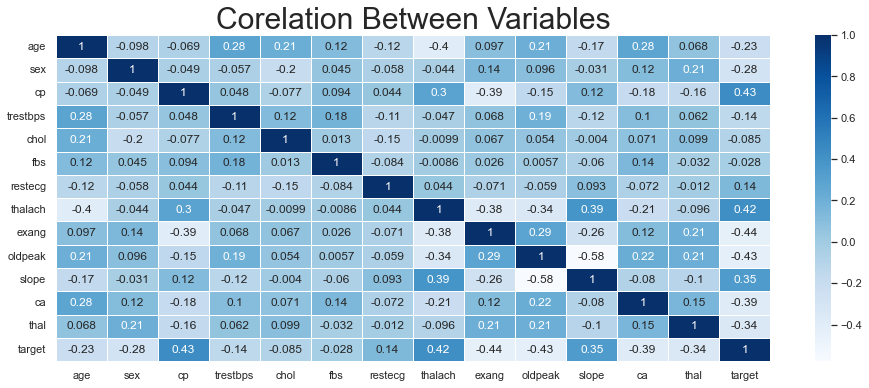

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (16, 6) 
sns.heatmap(heart_disease.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

Mean squared error: 410.07
Coefficient of determination: -0.10


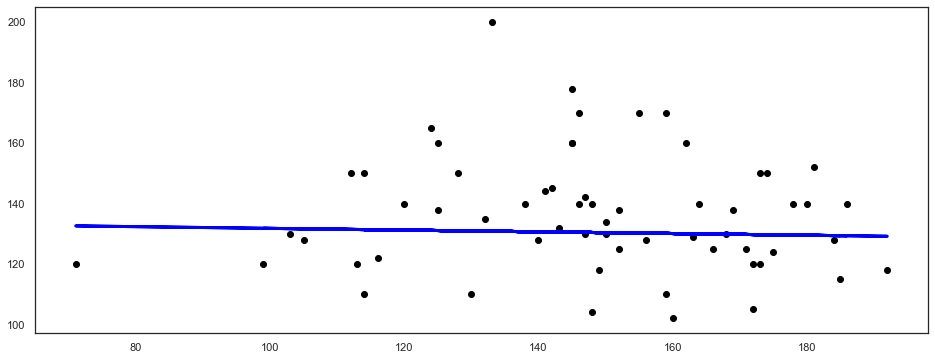

In [3]:
# Import the Linear Regression class
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Setup random seed
np.random.seed(42)

# Make the data
# X = heart_disease.drop("target", axis = 1)
X = np.array(heart_disease["thalach"]) #Use only one feature
y= np.array(heart_disease["trestbps"])

X = X.reshape(len(X), 1)

X  

# diabetes_X = diabetes_X[:, np.newaxis, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Instantiate LinearSVC
regr = linear_model.LinearRegression()

# Fit the model to the data (training the machine learning model)
regr.fit(X_train, y_train)


# Evaluate the LinearSVC
# regr.score([X_test], [y_test])
y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()

In [4]:
linear_table = heart_disease[["thalach","trestbps"]].copy(deep = "True")

In [5]:
linear_table.rename(columns = {'thalach':'X', 'trestbps':'Y'}, inplace = True)

In [6]:
linear_table.insert(len(linear_table.columns), 'X^2', linear_table["X"]**2)

In [7]:
linear_table.insert(len(linear_table.columns), 'Y^2', linear_table["Y"]**2)

In [8]:
linear_table.insert(len(linear_table.columns), 'X*Y', linear_table["X"] * linear_table["Y"])

In [9]:
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(linear_table["X"], linear_table["Y"])

In [10]:
print(slope, intercept)

-0.03575575920277444 136.97449963541717


In [11]:
linear_table

,X,Y,X^2,Y^2,X*Y
0,150,145,22500,21025,21750
1,187,130,34969,16900,24310
2,172,130,29584,16900,22360
3,178,120,31684,14400,21360
4,163,120,26569,14400,19560
...,...,...,...,...,...
298,123,140,15129,19600,17220
299,132,110,17424,12100,14520
300,141,144,19881,20736,20304
301,115,130,13225,16900,14950


Intercept is: [(ΣY)(ΣX2) – (ΣX)(ΣXY)] /  [n(ΣX2) – (ΣX)^2]

In [12]:
intercept = ((linear_table["Y"].sum() * linear_table["X^2"].sum()) - (linear_table["X"].sum() * linear_table["X*Y"].sum())) / ((linear_table.shape[0] * linear_table["X^2"].sum()) - (linear_table["X"].sum())**2 )
intercept

136.97449963541717

In [13]:
intercept = (EY*EX2 - EX*EXY) / ((n*EX2) - EX**2)
intercept

NameError: name 'EY' is not defined

In [ ]:
n = linear_table.shape[0]
EY = linear_table["Y"].sum()
EX = linear_table["X"].sum()
EY2 = linear_table["Y^2"].sum()
EX2 = linear_table["X^2"].sum()
EXY = linear_table["X*Y"].sum()

 Slope is: [n(ΣXY) – (ΣX)(ΣY)]  /  [n(ΣX2) – (ΣX)2]

In [ ]:
slope = (n*EXY - (EX*EY)) / ((n*EX2) - EX**2)
slope

In [14]:
intercept_graph = pd.DataFrame(columns = ['X', 'Y'])

In [15]:
intercept_graph["X"] = range(linear_table["X"].min(),linear_table["X"].max(),1)

In [17]:
intercept_graph["Y"] = slope * intercept_graph["X"] + intercept

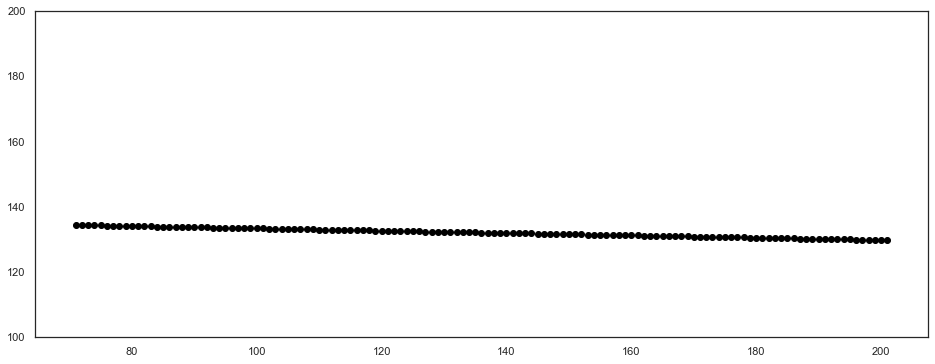

In [20]:
# Plot outputs
plt.scatter(intercept_graph["X"], intercept_graph["Y"], color="black")


# plt.xticks(())
# plt.yticks(())

# plt.xlim(-2, 2)
plt.ylim(100, 200)

plt.show()